## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
number_of_mice = combined_mouse_study_df["Mouse ID"].nunique()
number_of_mice

249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_mouse_study_df[combined_mouse_study_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
duplicate_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 

#duplicate_mouse_data.groupby["Mouse ID"]
#duplicate_mouse_data = duplicate_mouse_data.loc["g989"]
#duplicate_mouse_data

duplicate_mouse_data = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_data_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] != "g989"]
unique_mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
unique_mice = unique_mice_data_df["Mouse ID"].nunique()
unique_mice



248

## Summary Statistics

In [49]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## This method is the most straighforward, creating multiple series and putting them all together at the end.

#Get list of Drug Regimens
drug_list = combined_mouse_study_df["Drug Regimen"].value_counts()
drug_list

#tumor volume for each regimen: "Tumor Volume (mm3)"

mean_tumor = unique_mice_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumor

median_tumor = unique_mice_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_tumor

var_tumor = unique_mice_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
var_tumor

std_tumor = unique_mice_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_tumor

sem_tumor = unique_mice_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_tumor

series_stats_df = pd.DataFrame({"Mean Tumor Volume" : mean_tumor, 
                 "Median Tumor Volume" : median_tumor, 
                 "Variance of Tumor Volume" : var_tumor, 
                 "Standard Deviation of Tumor Volume" : std_tumor,
                 "SEM of Tumor Volume" : sem_tumor
                })
series_stats_df

#apply formatting? .style.format

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# example df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=aggregate#pandas.core.groupby.DataFrameGroupBy.aggregate

#first used combined_mouse_study_df that includes duplicate mouse
#changing to use cleaned df: unique_mice_data_df
summary_stats = unique_mice_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summary_stats

#apply formatting with .style.format?

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

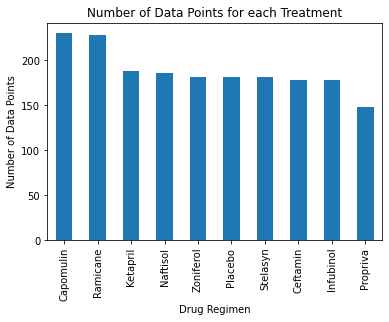

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#use clean df
unique_mice_data_df

#get count of data points for each treatment
drug_list = unique_mice_data_df["Drug Regimen"].value_counts()
drug_list


drug_list.plot(kind = "bar")

plt.title("Number of Data Points for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()





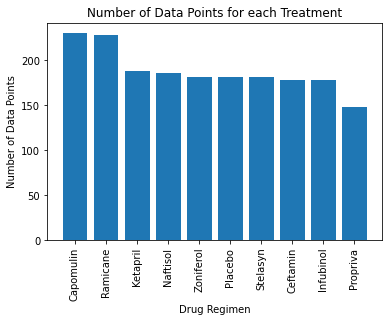

In [52]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
unique_mice_data_df

#get count of data points for each treatment
drug_list = unique_mice_data_df["Drug Regimen"].value_counts()
drug_list

#assign x and y values, rotate x ticks for readability
plt.bar(drug_list.index.values, drug_list.values)
plt.xticks(rotation = 90)
plt

plt.title("Number of Data Points for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

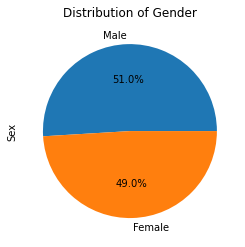

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#start with clean df
unique_mice_data_df

#find gender distro
gender_distro = unique_mice_data_df["Sex"].value_counts()
gender_distro

gender_distro.plot(kind = "pie", y=gender_distro, title=("Distribution of Gender"), autopct = "%1.1f%%")

plt.show()

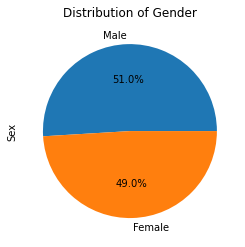

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#start with clean df
unique_mice_data_df

#find gender distro
gender_distro = unique_mice_data_df["Sex"].value_counts()
gender_distro

#use .keys() to assign labels to data
plt.pie(gender_distro, labels=gender_distro.keys(), autopct = "%1.1f%%")

plt.ylabel("Sex")
plt.title("Distribution of Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
##Capomulin, Ramicane, Infubinol, and Ceftamin
#filter by drug, example from:
#https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/
#subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]

drug_regimen_df = unique_mice_data_df[unique_mice_data_df ["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimen_df

## Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = drug_regimen_df.groupby(["Mouse ID"]).max().reset_index()
last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#last_timepoint_df[["Mouse ID", "Timepoint"]].merge(unique_mice_data_df, on=["Mouse ID", "Timepoint"])

tumor_calc_df = last_timepoint_df[["Mouse ID", "Timepoint"]].merge(unique_mice_data_df, on=["Mouse ID", "Timepoint"])
tumor_calc_df
#tumor_volume = pd.merge(last_timepoint, drug_regimen_df, on="Timepoint")
#tumor_volume

#make df with drugs and last timepoint
#pd.DataFrame({"Drug Regimen" : (drug_regimens),
#              "Final Tumor Volume" : (last_timepoint)})


#drug_regimen_df = pd.DataFrame(index=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
#                              columns=("Mouse ID", "Tumor Volume (mm3)"))

# Combine the data into a single dataset
#combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
#O: asking to select the four treatments from previous box--only Capomulin, Ramicane, Infubinol, and Ceftamin

#making a list of the selected four drug treatments 
#drug_treatments = last_timepoint_df["Drug Regimen"].unique()
drug_treatments = tumor_calc_df["Drug Regimen"].unique()
drug_treatments

#empty list for tumor volume values
tumor_vol_list = []

#finding values for tumor volume list 
for drug in drug_treatments:
    #print(drug)
    #attempting to call in one line, as Shay suggested:
    #tumor_volume = last_timepoint_df["Tumor Volume (mm3)"].loc[last_timepoint_df["Drug Regimen"] == drug]
    
    #drug_list = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == drug]
    drug_list = tumor_calc_df.loc[tumor_calc_df["Drug Regimen"] == drug]
    
    tumor_volume = drug_list["Tumor Volume (mm3)"]
    #print(tumor_volume) 
    tumor_vol_list.append(tumor_volume)
    #in for loop, print list to see what's happening
    #print(tumor_vol_list)

    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{drug} :")
    print("____________________\n")
    print(f"The lower quartile of the tumor volume of {drug} is: {lowerq}")
    print(f"The upper quartile of the tumor volume of {drug} is: {upperq}")
    print(f"The interquartile range of the tumor volume of {drug} is: {iqr}")
    print(f"The median of the tumor volume of {drug} is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.\n")

#use tumor_volume to calculate subset for each drug

#find IQR for Capomulin
# capomulin_regimen = tumor_volume.loc["Capomulin"]
# print(capomulin_regimen)

# #find IQR for Capomulin
# capomulin_regimen = drug_regimen_df.loc[drug_regimen_df
# print(capomulin_regimen)

# #find IQR for Capomulin
# capomulin_regimen = tumor_volume.loc[drug_regimen_df["Capomulin"]]
# capomulin_regimen



#drug_list_df = pd.DataFrame({"Drug Treatments" : drug_treatments})
#drug_list_df

# Create empty list to fill with tumor vol data (for plotting)

#["Tumor Volume (mm3)"]
#tumor_vol_list = []
# tumor_vol_list = for t_v in drug_regimen_df:
#                         tumor_volume.append(row[0])
    

#O: In this empty list, append values from for loop. 
#O: Use these four drugs to locate (.loc in drug regimen) in my clean dataframe to find only the mice that used those drugs
#O: also find tumor volumes
#pandas documentation for iterating through groups
#https://pandas.pydata.org/pandas-docs/version/0.17/groupby.html#iterating-through-groups

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Infubinol :
____________________

The lower quartile of the tumor volume of Infubinol is: 54.04860769
The upper quartile of the tumor volume of Infubinol is: 65.52574285
The interquartile range of the tumor volume of Infubinol is: 11.477135160000003
The median of the tumor volume of Infubinol is: 60.16518046
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.

Ceftamin :
____________________

The lower quartile of the tumor volume of Ceftamin is: 48.72207785
The upper quartile of the tumor volume of Ceftamin is: 64.29983003
The interquartile range of the tumor volume of Ceftamin is: 15.577752179999997
The median of the tumor volume of Ceftamin is: 59.85195552
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.

Ramicane :
____________________

The lower quartile of the tumor volume of Ramicane is: 31.56046955
The upper quartile of the tu

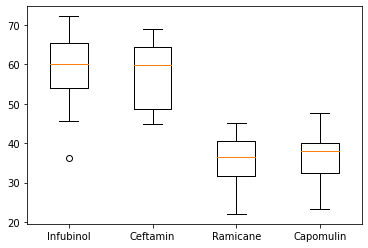

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#plt.boxplot(tumor_vol_list, labels=drug_treatments)
plt.boxplot(tumor_vol_list, labels=drug_treatments)
plt.show()

## Line and Scatter Plots

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
